## Projet SVM 


In [ ]:
# livrairies 
import kagglehub
import shutil
import os
import pandas as pd
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# on vérifie le chemin 
os.getcwd()

In [ ]:
#dossier src/ au path
src_path = Path.cwd().parent / "src"
sys.path.append(str(src_path))

# fonction propres 

In [204]:
palette = ["#C68E63", "#7F1D1D"]

# I. EDA : Exploration

In [140]:
# Télécharger le dataset
source_path = Path(kagglehub.dataset_download("datasetengineer/ovarian-cancer-risk-and-progression-data"))

#  copier le fichier
target_path = Path("..") / "data"

# copier le fichier dans le projet
shutil.copy(
    src=source_path / "Ovarian_patient_data.csv",
    dst=target_path / "Ovarian_patient_data.csv"
)
print("Dataset copié dans le dossier ./data du projet")

# chargement
csv_path = target_path / "Ovarian_patient_data.csv"
df = pd.read_csv(csv_path)

print(" dataset chargé, dimensions :", df.shape)


Dataset copié dans le dossier ./data du projet
 dataset chargé, dimensions : (200100, 34)


In [141]:
df.head()       # Aperçu des premières lignes

,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,2019-01-01 00:00:00,67.450712,27.468755,0,0,66.738329,0,serous,0,regular,...,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,2019-01-01 01:00:00,57.926035,27.736019,1,0,28.390526,1,clear cell,0,regular,...,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,2019-01-01 02:00:00,69.715328,22.285561,0,0,118.120787,3,clear cell,1,regular,...,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,2019-01-01 03:00:00,82.845448,31.315519,1,1,6.418598,0,serous,1,regular,...,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,2019-01-01 04:00:00,56.487699,17.056296,1,0,65.912779,1,mucinous,0,regular,...,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210


In [142]:
df.shape        # (n_observations, n_variables)

(200100, 34)

Au total nos avons 200100 et 34 variables 

### Résumé statistique

In [143]:
df.describe()

,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
count,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,...,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000
mean,59.901575,28.003226,0.300000,0.402384,34.874555,0.996067,0.199530,0.199825,0.250855,0.150025,...,50.030013,0.999722,2.496380,0.653193,0.199940,0.148931,13.014028,50.006837,0.650440,0.285436
std,14.668235,4.980700,0.458259,0.490380,34.411115,1.223703,0.399648,0.399870,0.433506,0.357097,...,9.993355,0.275003,1.443022,0.911912,0.399956,0.356021,1.468198,4.783299,0.909397,0.160168
min,18.000000,15.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.215829,0.500000,0.000007,0.000000,0.000000,0.000000,10.000000,40.000000,0.000000,0.000647
25%,49.891372,24.616558,0.000000,0.000000,10.057735,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.288079,0.796569,1.243463,0.000000,0.000000,0.000000,11.988691,46.674184,0.000000,0.160298
50%,60.025998,27.998428,0.000000,0.000000,24.162441,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.004486,1.000032,2.500433,0.000000,0.000000,0.000000,12.999088,50.006139,0.000000,0.264014
75%,70.141600,31.361152,1.000000,1.000000,48.421526,2.000000,0.000000,0.000000,1.000000,0.000000,...,56.784981,1.202314,3.743309,1.000000,0.000000,0.000000,14.013925,53.357075,1.000000,0.389292
max,90.000000,49.096832,1.000000,1.000000,200.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,99.203153,1.500000,4.999994,3.000000,1.000000,1.000000,18.000000,60.000000,3.000000,0.950690


### Analyse des statiques :

L'âge de personnes participant va de min 18 à 90 




**Vérification des n/a et types des variables**

In [144]:
df.info() # nous permet de vérifier les types et na

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               200100 non-null  object 
 1   Age                     200100 non-null  float64
 2   BMI                     200100 non-null  float64
 3   Comorbidity             200100 non-null  int64  
 4   Symptom                 200100 non-null  int64  
 5   CA125                   200100 non-null  float64
 6   CancerStage             200100 non-null  int64  
 7   Histopathology          200100 non-null  object 
 8   PreviousTreatment       200100 non-null  int64  
 9   MenstrualHistory        200100 non-null  object 
 10  Ethnicity               200100 non-null  object 
 11  Smoking                 200100 non-null  int64  
 12  Alcohol                 200100 non-null  int64  
 13  Residence               200100 non-null  object 
 14  SocioeconomicStatus 

In [145]:
#  Valeurs manquantes
df.isna().sum().value_counts()


0    34
Name: count, dtype: int64

Notre jeu de données n'a pas de valeur manquants N/A, comme nous l'avions déjà vu avec info()

### Types

Nous allons séparer nous variables pour mieux les analyse en numeriques, catégoriques, etc et vérifier que les types sont correctes ou s'il faut les corriger 

In [146]:
def detect_variable_types(df):
    types = {
        "numerical": [],
        "categorical": [],
        "datetime": [],
        "boolean": [],
        "others": []
    }

    for col in df.columns:
        if pd.api.types.is_bool_dtype(df[col]):  # mettre ce test en premier
            types["boolean"].append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            types["numerical"].append(col)
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            types["datetime"].append(col)
        elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
            types["categorical"].append(col)
        else:
            types["others"].append(col)

    return types


In [147]:
types = detect_variable_types(df)

print(" Variables numériques :", types["numerical"])
print(" Variables catégorielles :", types["categorical"])
print(" Variables date :", types["datetime"])
print(" Variables booléennes :", types["boolean"])


 Variables numériques : ['Age', 'BMI', 'Comorbidity', 'Symptom', 'CA125', 'CancerStage', 'PreviousTreatment', 'Smoking', 'Alcohol', 'BRCA_Mutation', 'GeneExpression', 'SNP_Status', 'DNAMethylation', 'miRNA', 'TumorSize', 'EnhancementPattern', 'RadiomicTexture', 'RadiomicIntensity', 'RadiomicShape', 'DopplerVelocity', 'Parity', 'OralContraceptives', 'HormoneTherapy', 'MenarcheAge', 'MenopauseAge', 'RiskLabel', 'ProgressionProbability']
 Variables catégorielles : ['Timestamp', 'Histopathology', 'MenstrualHistory', 'Ethnicity', 'Residence', 'SocioeconomicStatus', 'TumorLocation']
 Variables date : []
 Variables booléennes : []


Certains types de variables doivent être corrigés : 

In [148]:

#  colonnes à forcer
boolean_cols = [
    "Comorbidity", "Symptom", "PreviousTreatment", "Smoking", "Alcohol", "BRCA_Mutation", "SNP_Status", "OralContraceptives", "HormoneTherapy"
]

categorical_cols = [
    "Histopathology", "Ethnicity", "SocioeconomicStatus"
]
# conversion des types
df[boolean_cols] = df[boolean_cols].astype(bool)
df[categorical_cols] = df[categorical_cols].astype("category")

# colonne timestamp
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Relancer fonction de détection pour vérifier
types = detect_variable_types(df)
print("Numériques :", types["numerical"])
print("Catégorielles :", types["categorical"])
print("Booléennes :", types["boolean"])
print("Date :", types["datetime"])


Numériques : ['Age', 'BMI', 'CA125', 'CancerStage', 'GeneExpression', 'DNAMethylation', 'miRNA', 'TumorSize', 'EnhancementPattern', 'RadiomicTexture', 'RadiomicIntensity', 'RadiomicShape', 'DopplerVelocity', 'Parity', 'MenarcheAge', 'MenopauseAge', 'RiskLabel', 'ProgressionProbability']
Catégorielles : ['Histopathology', 'MenstrualHistory', 'Ethnicity', 'Residence', 'SocioeconomicStatus', 'TumorLocation']
Booléennes : ['Comorbidity', 'Symptom', 'PreviousTreatment', 'Smoking', 'Alcohol', 'BRCA_Mutation', 'SNP_Status', 'OralContraceptives', 'HormoneTherapy']
Date : ['Timestamp']


/var/folders/2l/f5l9z1cs11n1_jhzw_zg2r_r0000gp/T/ipykernel_33906/3048022191.py:17: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):


In [149]:
# Date min et date max dans le jeu de données
date_min = df["Timestamp"].min()
date_max = df["Timestamp"].max()

print("Première date enregistrée :", date_min)
print("Dernière date enregistrée  :", date_max)

Première date enregistrée : 2019-01-01 00:00:00
Dernière date enregistrée  : 2041-10-29 11:00:00


### Anomalies 


date_max = df["Timestamp"].max() = Dernière date enregistrée  : 2041-10-29 11:00:00

In [150]:
df[df["Timestamp"] > "2025-01-01"]


,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
52609,2025-01-01 01:00:00,46.270935,33.986451,False,False,8.911073,0,serous,False,regular,...,43.492881,0.726335,2.294527,2,False,False,13.666383,50.797279,0,0.477190
52610,2025-01-01 02:00:00,35.347778,23.744016,True,False,5.105866,0,mucinous,False,regular,...,48.600606,0.600816,1.164327,1,False,False,12.576281,48.511256,0,0.378906
52611,2025-01-01 03:00:00,55.175341,22.010662,False,False,26.716375,0,serous,False,irregular,...,49.468658,0.867014,2.890420,0,False,True,13.169052,53.868338,0,0.390577
52612,2025-01-01 04:00:00,41.879926,22.647138,False,False,12.126083,1,serous,False,irregular,...,54.013356,0.870841,2.461006,0,False,False,12.751521,52.006178,0,0.281866
52613,2025-01-01 05:00:00,66.063805,26.076333,False,True,8.806640,2,serous,False,regular,...,54.024341,1.331770,3.403088,2,False,False,12.592850,53.425016,1,0.326278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,2041-10-29 07:00:00,56.482842,37.250369,True,True,10.963560,3,serous,False,regular,...,52.644672,0.500000,3.499102,0,False,False,12.593397,53.628508,2,0.179641
200096,2041-10-29 08:00:00,45.268634,16.790468,False,False,66.198115,0,serous,False,irregular,...,46.996590,1.009867,2.807436,1,False,False,13.653758,52.514075,3,0.312034
200097,2041-10-29 09:00:00,77.853943,21.333605,False,False,41.621119,2,serous,False,regular,...,50.529664,0.829427,4.394963,0,False,False,10.527138,60.000000,2,0.043449
200098,2041-10-29 10:00:00,71.047060,31.607421,True,False,59.717572,0,serous,False,regular,...,48.182645,0.989097,2.777310,0,False,False,13.053107,51.423338,0,0.223509


In [151]:
df["Timestamp"].dt.year.value_counts().sort_index()


Timestamp
2019    8760
2020    8784
2021    8760
2022    8760
2023    8760
2024    8784
2025    8760
2026    8760
2027    8760
2028    8784
2029    8760
2030    8760
2031    8760
2032    8784
2033    8760
2034    8760
2035    8760
2036    8784
2037    8760
2038    8760
2039    8760
2040    8784
2041    7236
Name: count, dtype: int64

## Question :
Nous nous demandons si nous sommes face à de données simulées ???

Exactement 8760 ou 8784 lignes par an, ce qui correspond pile à :

8760 h = 365 j (année normale)

8784 h = 366 j (année bissextile)

**Distribution de variables continues**

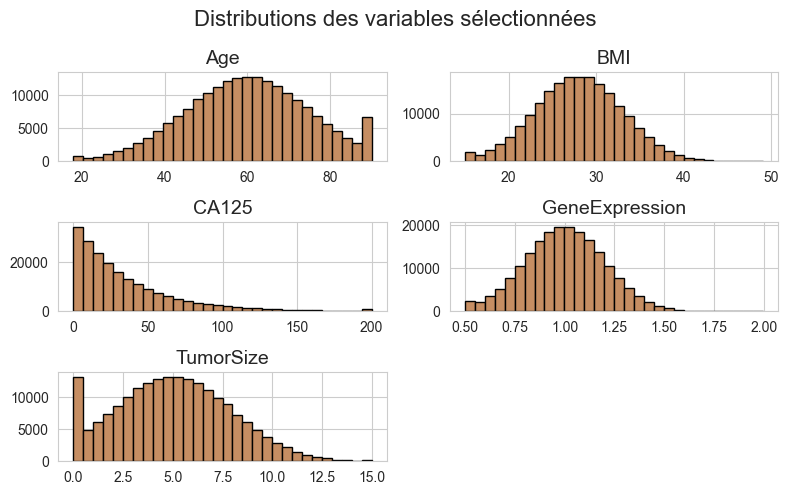

In [192]:
df[["Age", "BMI", "CA125", "GeneExpression", "TumorSize"]].hist(
    bins=30,
    grid=True,
    figsize=(8, 5),
    color=palette[0],
    edgecolor="black",
)

plt.suptitle("Distributions des variables sélectionnées", fontsize=16)
plt.tight_layout()
plt.show()

**Variables catégorielles**

In [193]:
for col in ["Histopathology", "Ethnicity", "SocioeconomicStatus"]:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True))



Histopathology value counts:
Histopathology
serous        0.701869
mucinous      0.199310
clear cell    0.098821
Name: proportion, dtype: float64

Ethnicity value counts:
Ethnicity
Caucasian    0.598771
Asian        0.201254
African      0.149655
Hispanic     0.050320
Name: proportion, dtype: float64

SocioeconomicStatus value counts:
SocioeconomicStatus
Middle    0.501874
Low       0.398651
High      0.099475
Name: proportion, dtype: float64


Histopathology

Type	Proportion
serous	~70 % 
mucinous	~20 %
clear cell	~10 %
cohérent avec la littérature médicale. Pas anormal, mais un peu "trop net"


Ethnicity

Ethnicité	Proportion
Caucasian	~60 %
Asian	~20 %
African	~15 %
Hispanic	~5 %
répartition presque parfaite (60/20/15/5)


SocioeconomicStatus

Statut	Proportion
Middle	~50 %
Low	~40 %
High	~10 %



### Conclusion provisoire :
Ce dataset semble simulé :

- pas de NaN

- distributions très propres

- dates régulières sur 23 ans

- répartition presque parfaite dans les catégories

# II. EDA : Univariée & Bivariée

### Objectif : 
Comprendre la distribution de chaque variable seule

**Numériques**:

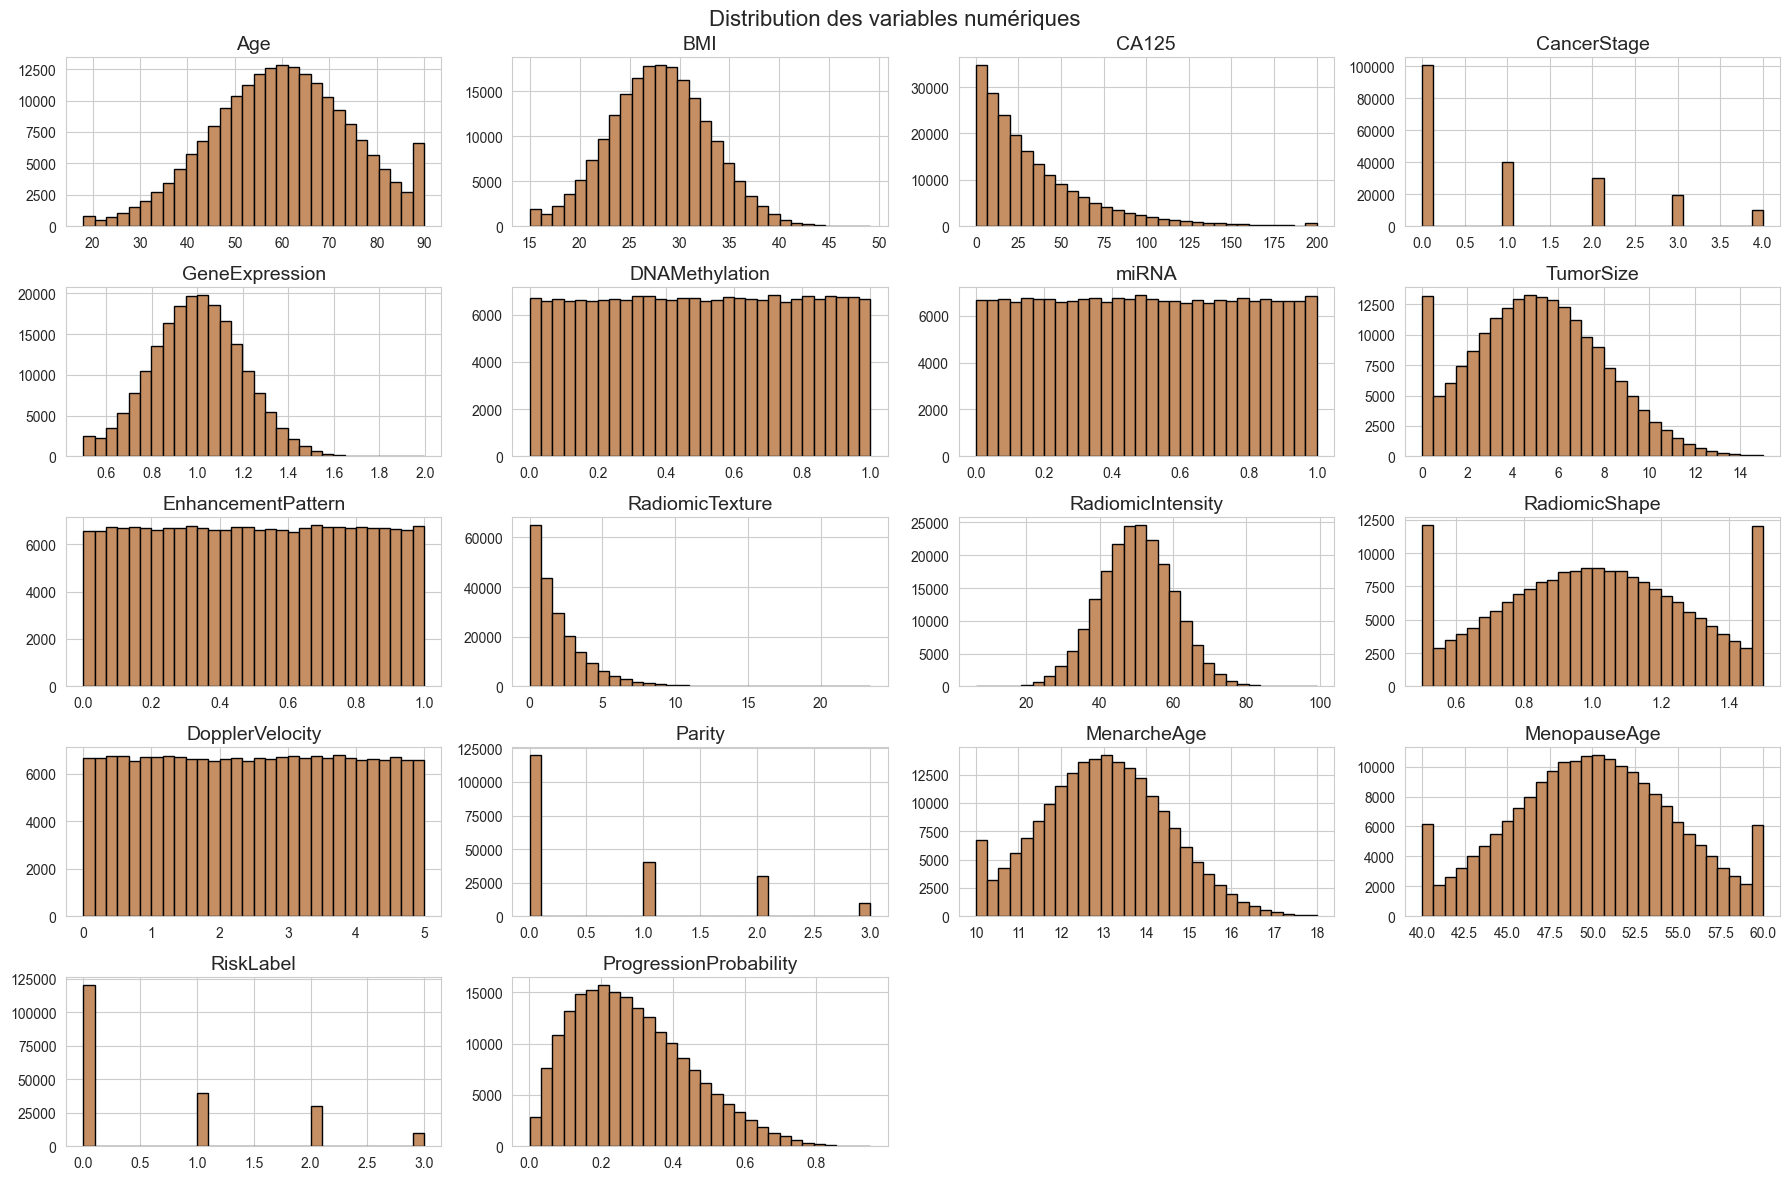

In [194]:
numerical_cols = types["numerical"]

df[numerical_cols].describe().T

# Histogrammes
df[numerical_cols].hist(
    bins=30,
    figsize=(18, 12),
    grid=True,
    color=palette[0],
    edgecolor="black",
)

plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()

**Catégorielles**

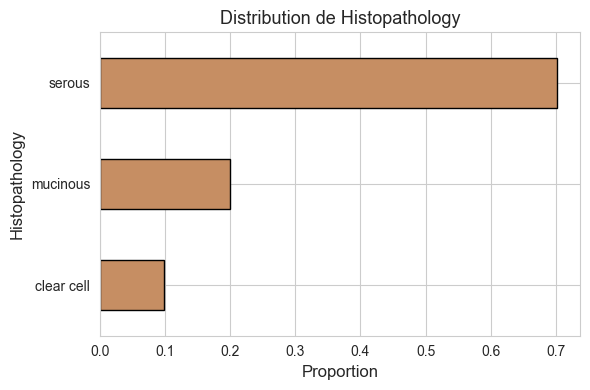

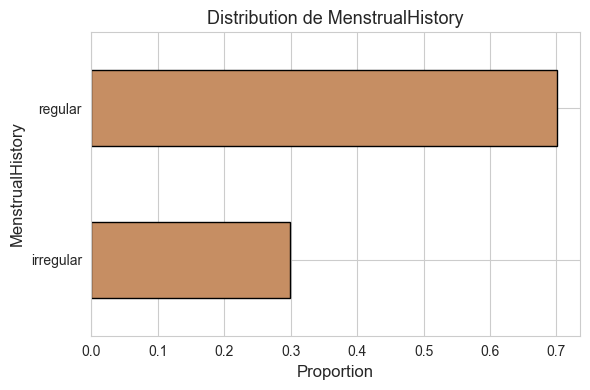

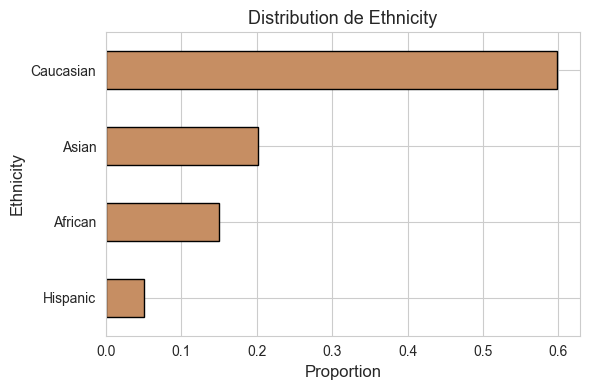

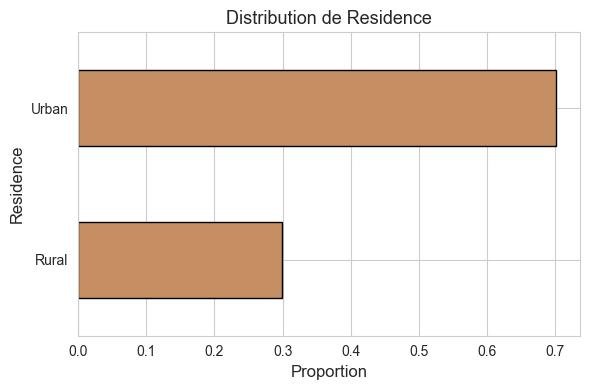

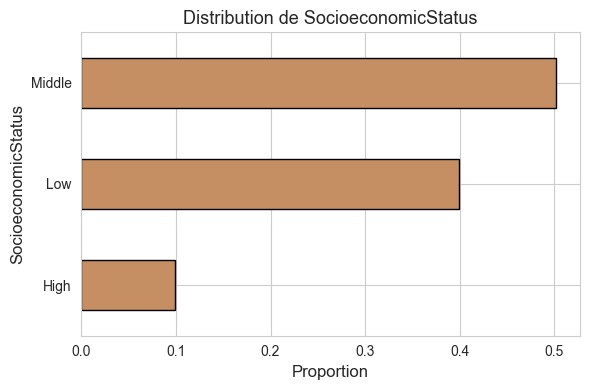

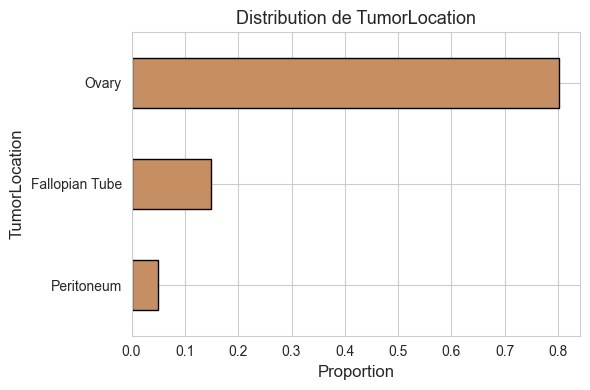

In [205]:
categorical_cols = types["categorical"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(normalize=True).sort_values().plot(
        kind='barh',
        color=palette[0],
    edgecolor="black",
    )
    plt.title(f"Distribution de {col}", fontsize=13)
    plt.xlabel("Proportion")
    plt.tight_layout()
    plt.show()

**Booléennes**

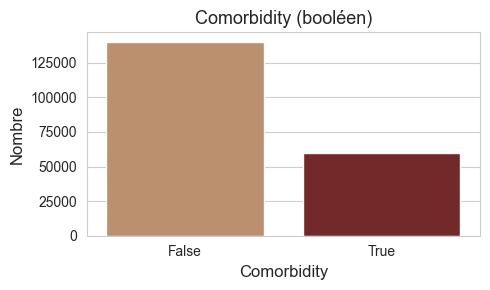

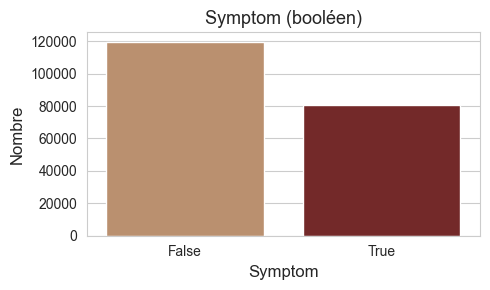

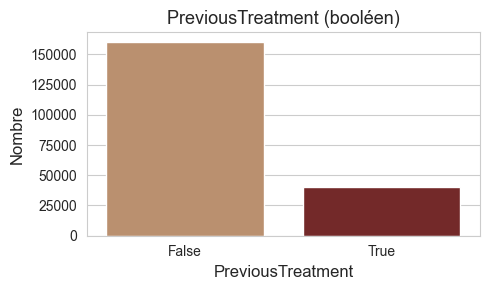

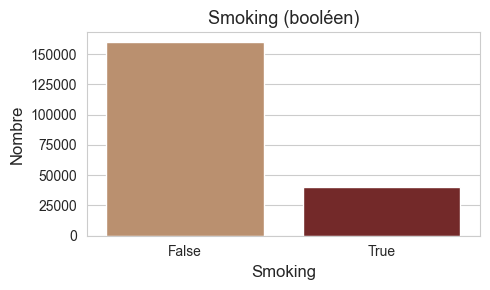

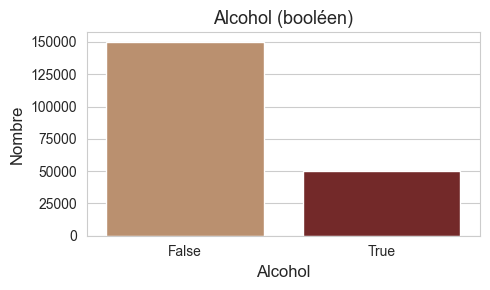

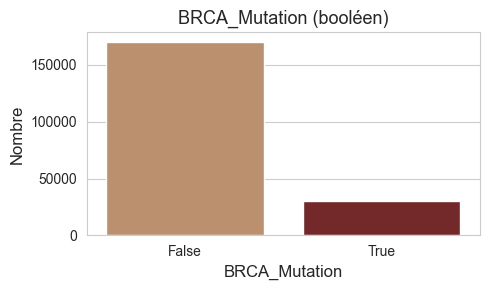

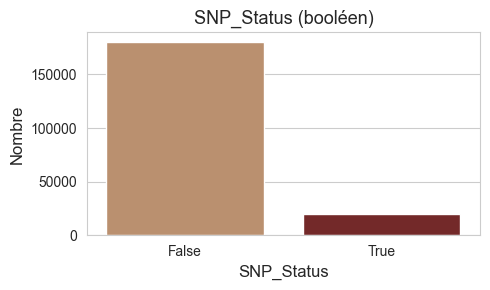

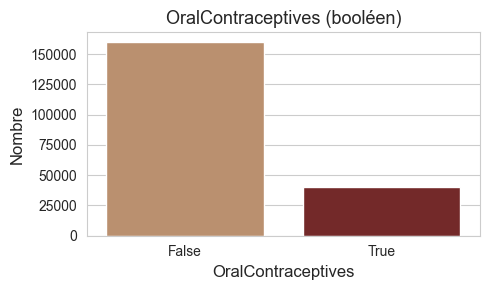

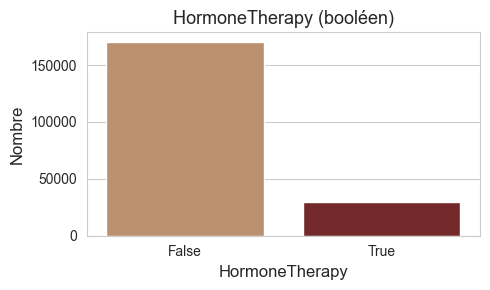

In [212]:
bool_cols = types["boolean"]

for col in bool_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(
        x=col,
        data=df,
        hue=col,                      
        palette=palette,
        dodge=False
    )
    plt.title(f"{col} (booléen)", fontsize=13)
    plt.ylabel("Nombre")
    plt.xlabel(col)
    plt.legend().remove()            
    plt.tight_layout()
    plt.show()


### Création variable binaire cible :

In [157]:
# Création de la cible binaire
df["RiskBinary"] = (df["RiskLabel"] > 0).astype("category")

# Vérification rapide
df["RiskBinary"].value_counts(normalize=True)


RiskBinary
False    0.599525
True     0.400475
Name: proportion, dtype: float64

### Variables numériques vs RiskBinary

#### Objectif : 

comparer les distributions des variables numériques selon la classe 0 ou 1

**Numérique vs Cible (boxplots)**

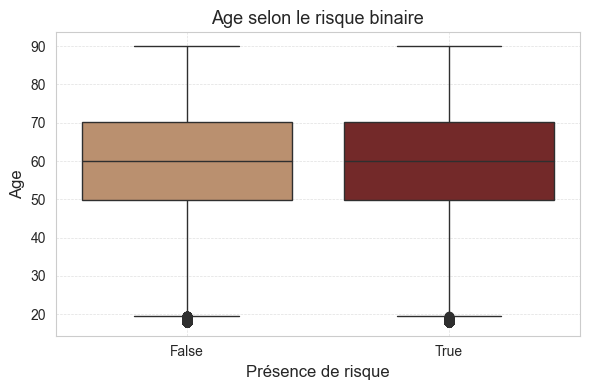

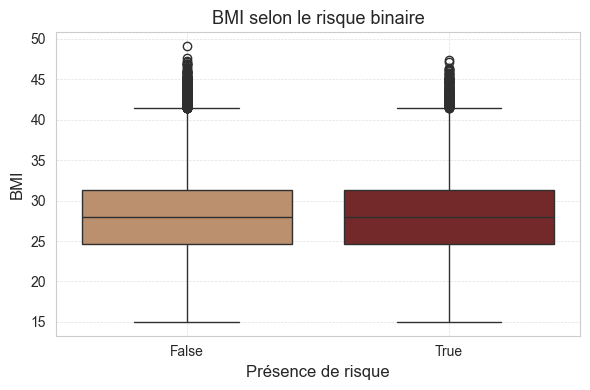

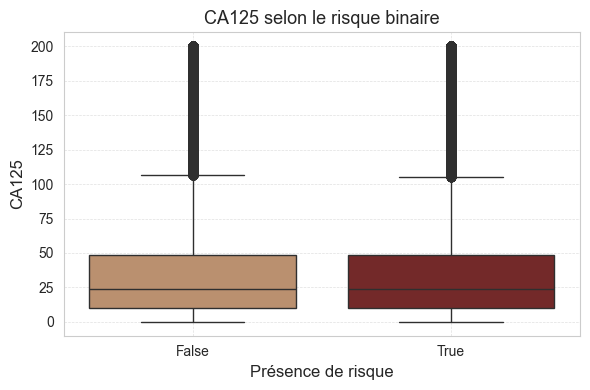

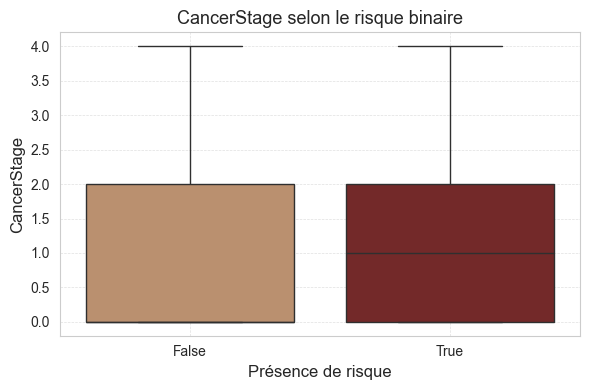

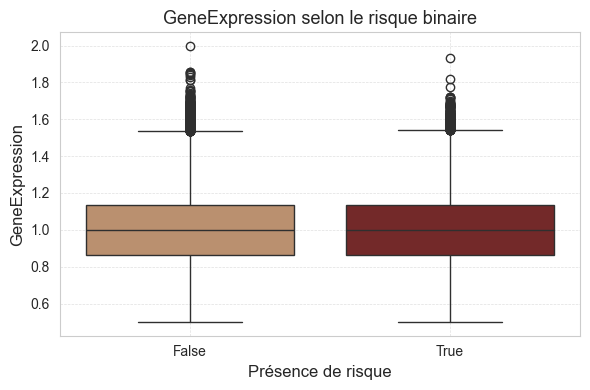

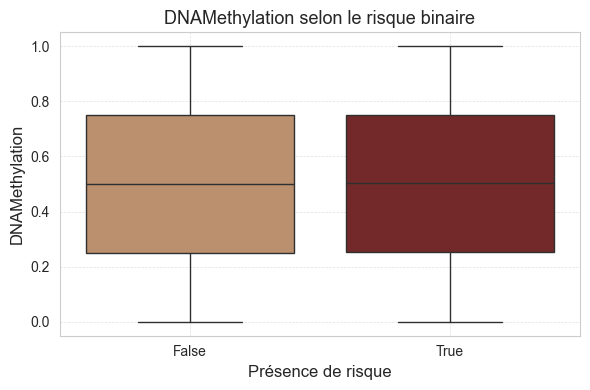

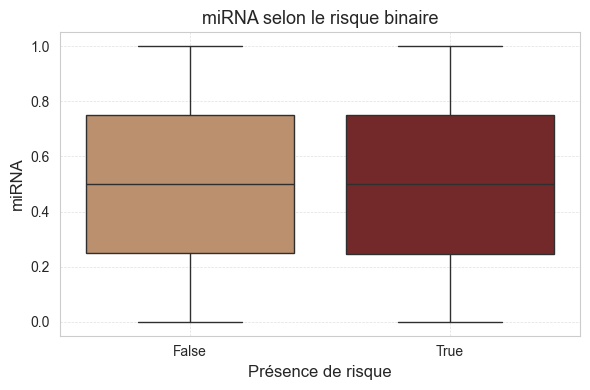

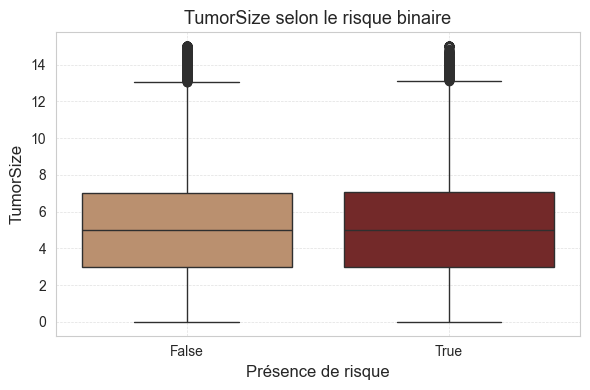

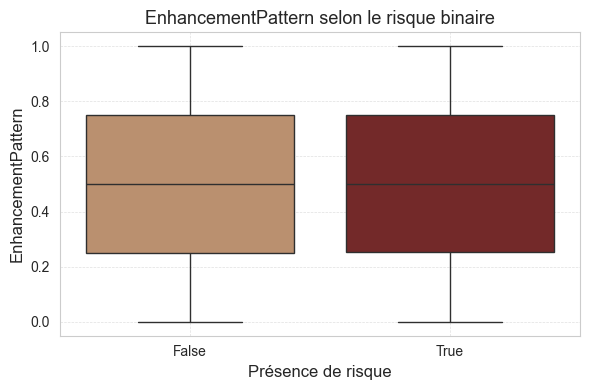

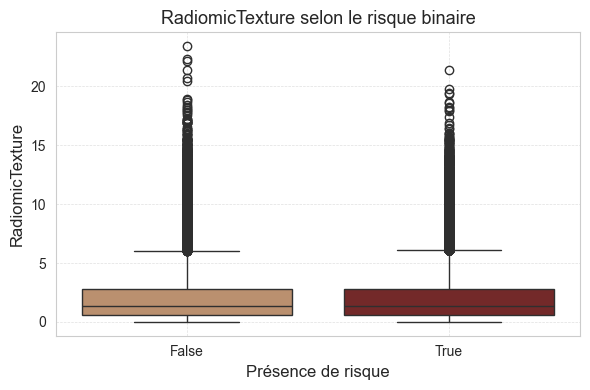

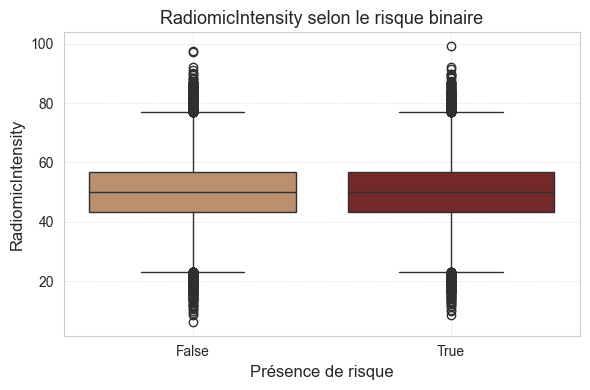

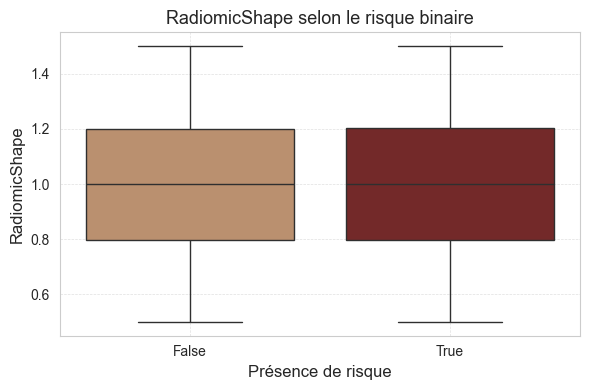

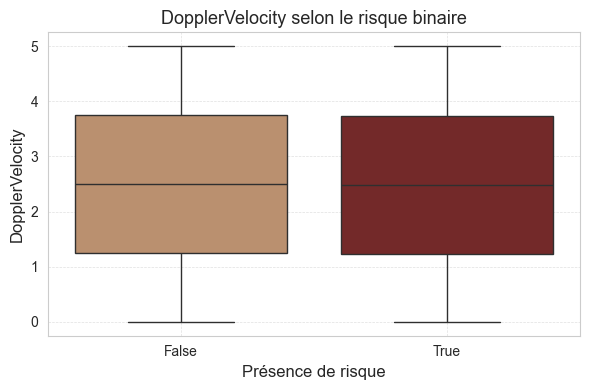

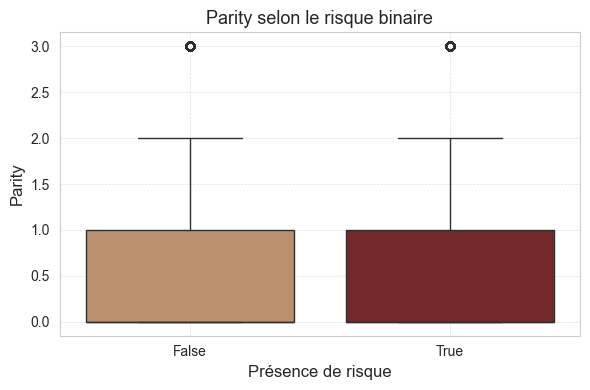

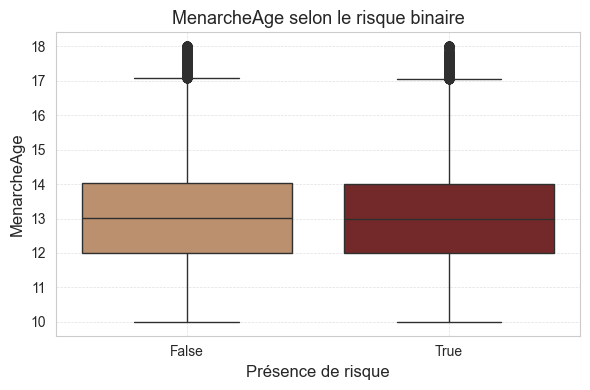

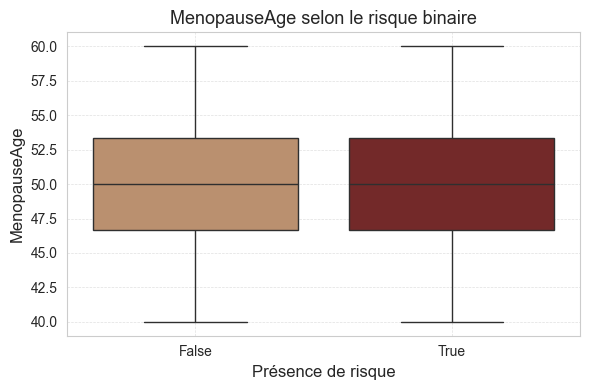

In [ ]:
for col in types["numerical"]:
    if col not in ["RiskLabel", "ProgressionProbability", "RiskBinary"]:
        plt.figure(figsize=(6, 4))
        sns.boxplot(
            x="RiskBinary",
            y=col,
            data=df,
            hue="RiskBinary",               
            palette=palette,
            dodge=False                       
        )
        plt.title(f"{col} selon le risque binaire", fontsize=13)
        plt.xlabel("Présence de risque")
        plt.ylabel(col)
        plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
        plt.legend().remove()                
        plt.tight_layout()
        plt.show()


### Variables catégorielles / booléennes vs RiskBinary
Objectif : voir si certaines modalités sont plus fréquentes dans le risque

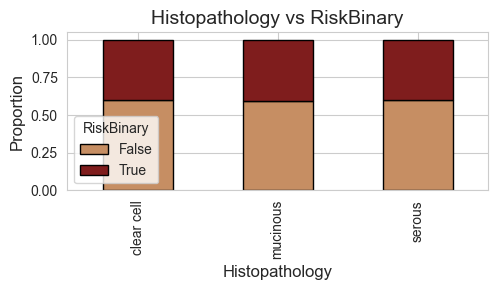

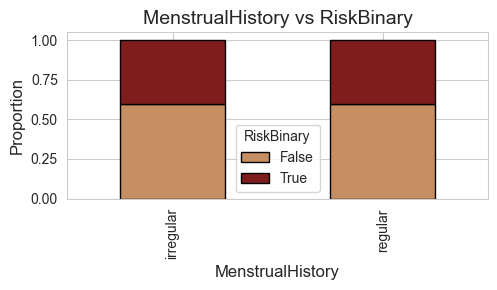

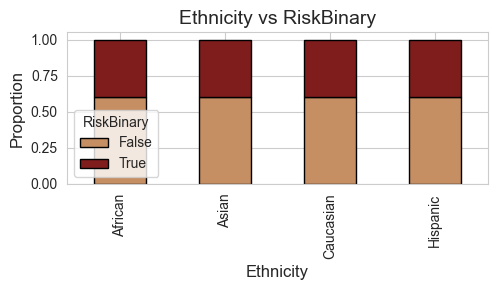

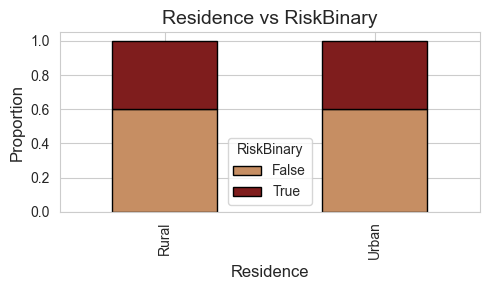

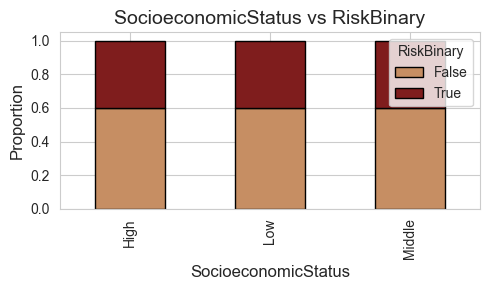

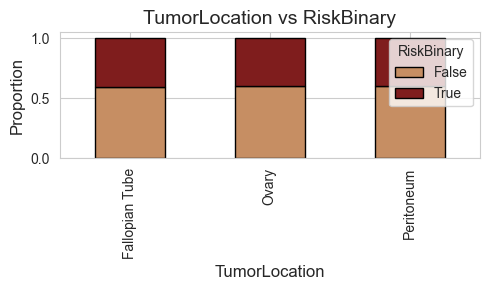

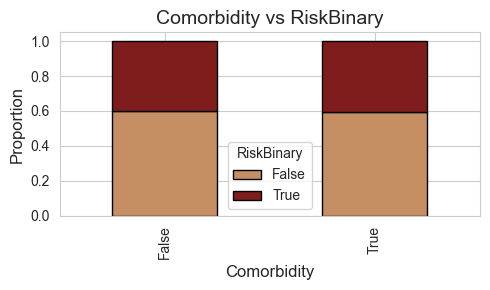

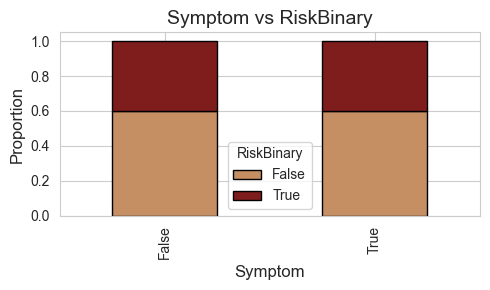

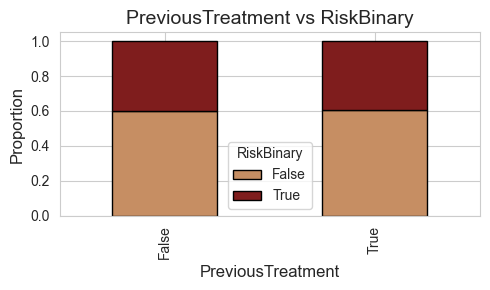

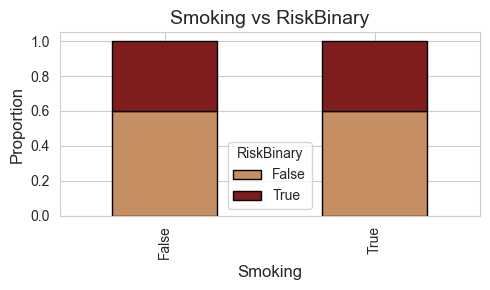

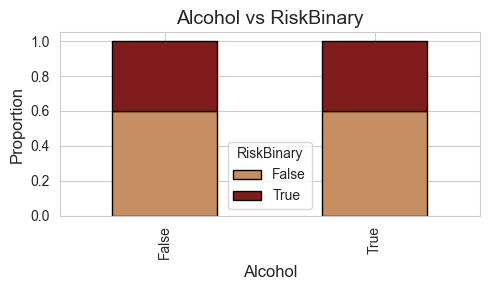

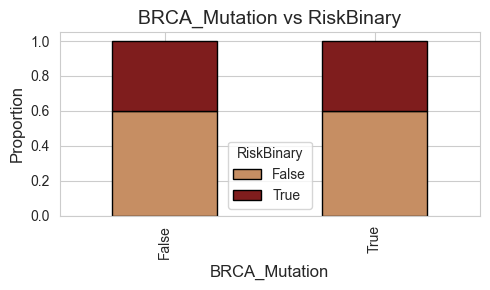

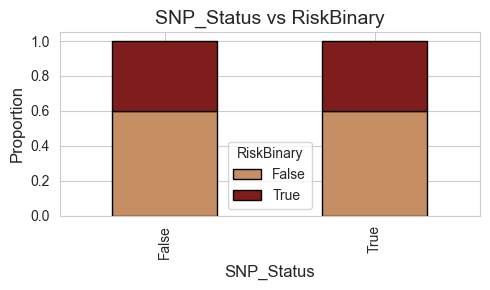

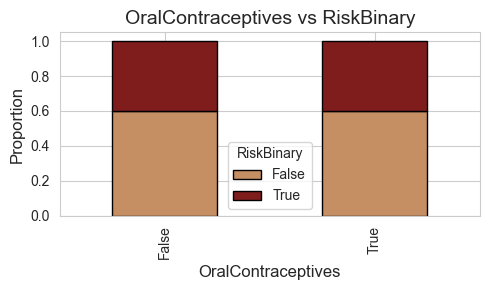

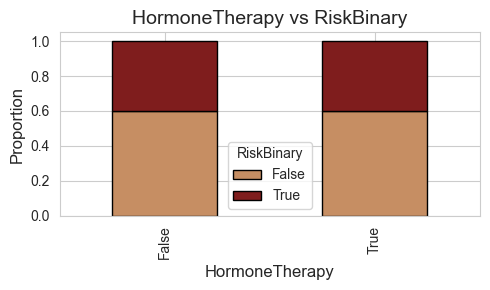

In [214]:
for col in types["categorical"] + types["boolean"]:
    ct = pd.crosstab(df[col], df["RiskBinary"], normalize='index')
    ct.plot(
        kind='bar',
        stacked=True,
        color=palette,  
        edgecolor="black",
        figsize=(5, 3)
    )
    plt.title(f"{col} vs RiskBinary")
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()


### Corrélations numériques avec riskBinary

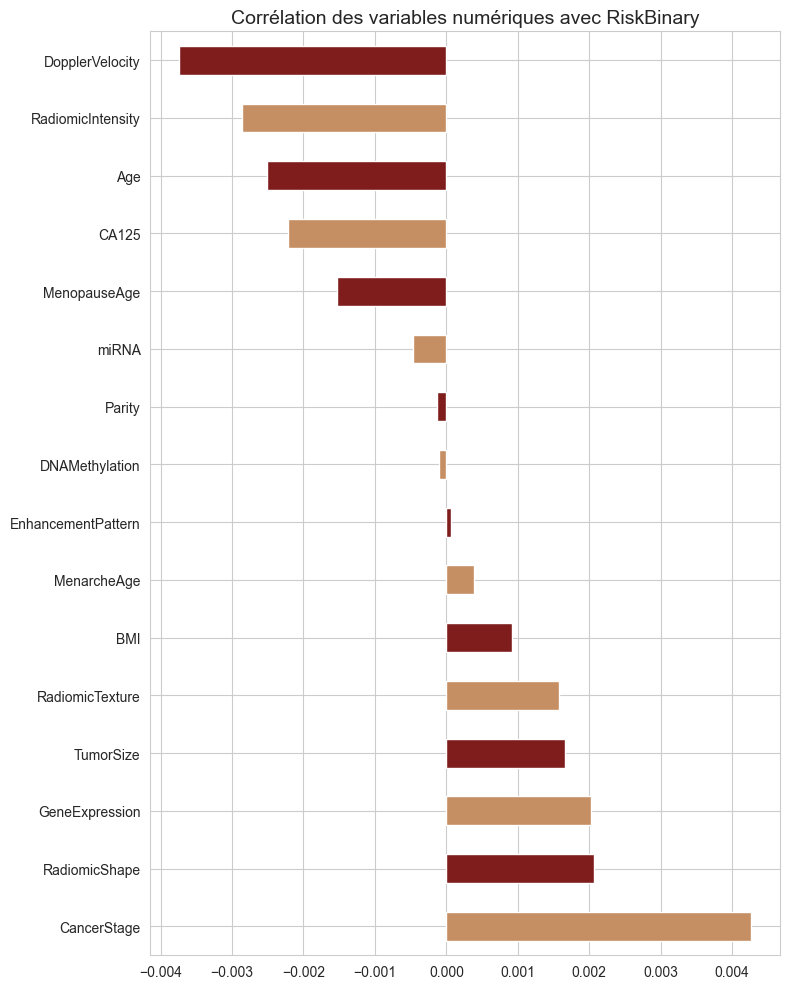

CancerStage          0.004269
DopplerVelocity      0.003741
RadiomicIntensity    0.002858
Age                  0.002509
CA125                0.002221
dtype: float64


In [215]:
# on doit exclure  riskLabel, riskBinary et progressionProbability des corrélations
numerical_for_corr = [
    col for col in types["numerical"]
    if col not in ["RiskLabel", "RiskBinary", "ProgressionProbability"]
]

# Corrélation avec riskBinary
correlations = df[numerical_for_corr].corrwith(df["RiskBinary"])
correlations.sort_values(ascending=False).plot(
    kind="barh",
    figsize=(8, 10),
    color=palette,
    title="Corrélation des variables numériques avec RiskBinary"
)
plt.tight_layout()
plt.show()

print(correlations.abs().sort_values(ascending=False).head(5))
